Biblioteki i import pliku CSV

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from IPython.display import display

data = pd.read_csv('dataframe.csv')

Wyświetlenie tabeli danych

In [2]:
data.head()

,x1,"""y1""","""x2""","""y2""","""x3""","""y3""","""x4""","""y4"""
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [2]:
data.columns = data.columns.str.replace('"', '').str.strip()

In [4]:
data.columns

Index(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'], dtype='object')

Funkcja regresji liniowej

In [3]:
def analyze_pair(data, pair_number):
    x = data[f"x{pair_number}"]
    y = data[f"y{pair_number}"]
    
    # Obliczanie średnich i wariancji
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)  # wariancja próby
    var_y = np.var(y, ddof=1)
    corr_coeff = np.corrcoef(x, y)[0, 1]  # współczynnik korelacji

    # Regresja liniowa
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value ** 2  # współczynnik determinacji

    results_df = pd.DataFrame({
        "Statystyka": ["Średnia X", "Średnia Y", "Wariancja X", "Wariancja Y", 
                      "Współczynnik korelacji", "Równanie regresji liniowej", "Współczynnik determinacji"],
        "Wartość": [mean_x, mean_y, var_x, var_y, corr_coeff, 
                  f"y = {slope:.2f}x + {intercept:.2f}", r_squared]
    })
    
    # Wykres rozrzutu z linią regresji
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label='Punkty danych')
    plt.plot(x, slope * x + intercept, color='red', label='Linia regresji')
    plt.xlabel(f"x{pair_number}")
    plt.ylabel(f"y{pair_number}")
    plt.title(f"Wykres rozrzutu z linią regresji dla zestawu {pair_number}")
    plt.legend()
    plt.show()
    
    return results_df

Wykresy

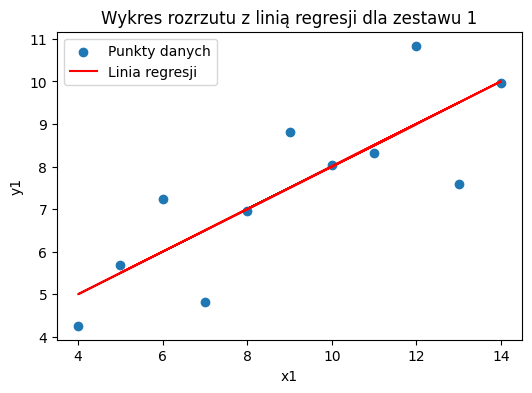

,Wartość
Statystyka,
Średnia X,9.0
Średnia Y,7.500909
Wariancja X,11.0
Wariancja Y,4.127269
Współczynnik korelacji,0.816421
Równanie regresji liniowej,y = 0.50x + 3.00
Współczynnik determinacji,0.666542


In [4]:
results_pair_1 = analyze_pair(data, 1)
display(results_pair_1.set_index("Statystyka"))

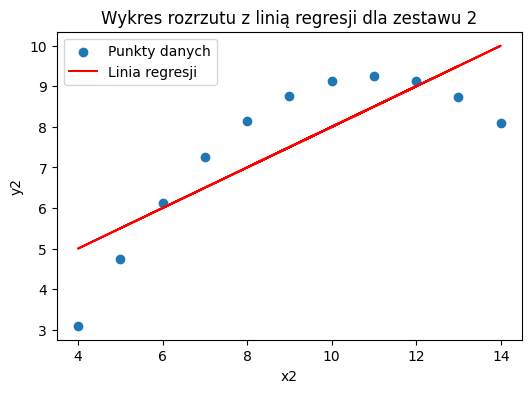

,Wartość
Statystyka,
Średnia X,9.0
Średnia Y,7.500909
Wariancja X,11.0
Wariancja Y,4.127629
Współczynnik korelacji,0.816237
Równanie regresji liniowej,y = 0.50x + 3.00
Współczynnik determinacji,0.666242


In [5]:
results_pair_2 = analyze_pair(data, 2)
display(results_pair_2.set_index("Statystyka"))

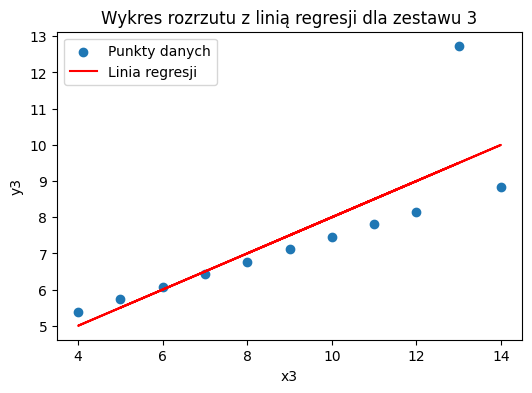

,Wartość
Statystyka,
Średnia X,9.0
Średnia Y,7.5
Wariancja X,11.0
Wariancja Y,4.12262
Współczynnik korelacji,0.816287
Równanie regresji liniowej,y = 0.50x + 3.00
Współczynnik determinacji,0.666324


In [6]:
results_pair_3 = analyze_pair(data, 3)
display(results_pair_3.set_index("Statystyka"))

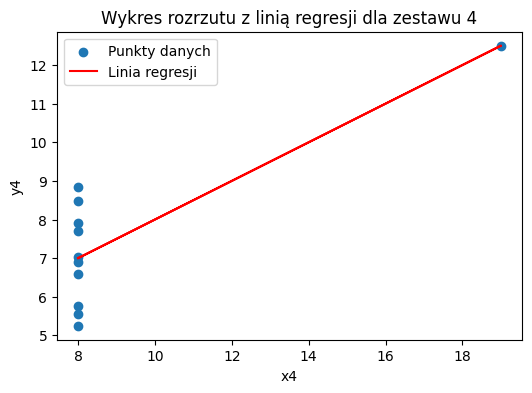

,Wartość
Statystyka,
Średnia X,9.0
Średnia Y,7.500909
Wariancja X,11.0
Wariancja Y,4.123249
Współczynnik korelacji,0.816521
Równanie regresji liniowej,y = 0.50x + 3.00
Współczynnik determinacji,0.666707


In [7]:
results_pair_4 = analyze_pair(data, 4)
display(results_pair_4.set_index("Statystyka"))

Tabela wyników analizy

In [8]:
final_combined_results = pd.concat([results_pair_1.set_index("Statystyka"),
                                    results_pair_2.set_index("Statystyka"),
                                    results_pair_3.set_index("Statystyka"),
                                    results_pair_4.set_index("Statystyka")], axis=1)

final_combined_results.columns = ["Para 1", "Para 2", "Para 3", "Para 4"]

display(final_combined_results)

,Para 1,Para 2,Para 3,Para 4
Statystyka,,,,
Średnia X,9.0,9.0,9.0,9.0
Średnia Y,7.500909,7.500909,7.5,7.500909
Wariancja X,11.0,11.0,11.0,11.0
Wariancja Y,4.127269,4.127629,4.12262,4.123249
Współczynnik korelacji,0.816421,0.816237,0.816287,0.816521
Równanie regresji liniowej,y = 0.50x + 3.00,y = 0.50x + 3.00,y = 0.50x + 3.00,y = 0.50x + 3.00
Współczynnik determinacji,0.666542,0.666242,0.666324,0.666707


Wnioski

Można zauważysz bardzo zbliżone lub wręcz takie same wyniki analiz dla wszystkich par. Jednak para zestawu 4 ma takie same wartości X, których analiza za pomocą regresji liniowej nie jest zbyt dobra dla tego modelu.